#### Our goal is to build a ML model to  classify if a person has heart disease or not let us get started .

### Let us define the buisness problem 
    > From the data we can see we have total of 17 features 
    > We are trying to predict whether the patient has a chance a 10 year risk of chd(coronary heart disease)
    >TenYearCHD is the target variable.
    >Each attribute is a potential risk factor
    >There are both demographic,behavioural and medical risk factors to be considered in this situation.

In [1]:
### let us import the required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [2]:
#let us import the data 
heart_disease = pd.read_csv('./Downloads/data_cardiovascular_risk.csv')

## Let us perfrom some EDA on the given data.

In [3]:
#let us check the data 
heart_disease

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


## As we can see there are 3390 samples 

In [4]:
#let us check the info of the data 
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## There are 17 columns as seen from the info attribute.

In [5]:
#let us check the head of the dataframe
heart_disease.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
#let us check the tail of the dataframe
heart_disease.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
#let us describe the dataframe.
heart_disease.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### From the above dataframe we notice that most of the patients in the given past record do not have a risk of 10 year coronary heart disease that is about 75 percent of the patients which is a good enough assumption.

In [8]:
#let us start off with some visualization.

In [9]:
heart_disease.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


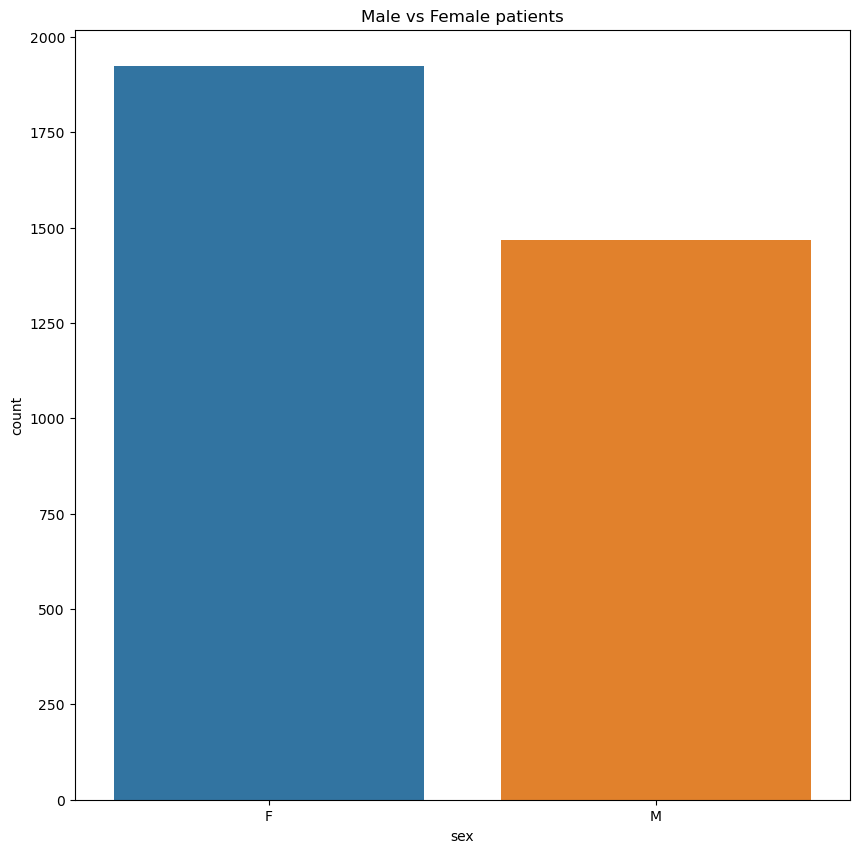

In [10]:
#let us check the count of male and females 
fig,ax = plt.subplots(figsize=(10,10))#we are using the matplotlib object oriented api method as shown
ax = sns.countplot(x='sex',data=heart_disease)
plt.title('Male vs Female patients')
plt.show()

### This gives a cleare indication that femals patients were more 

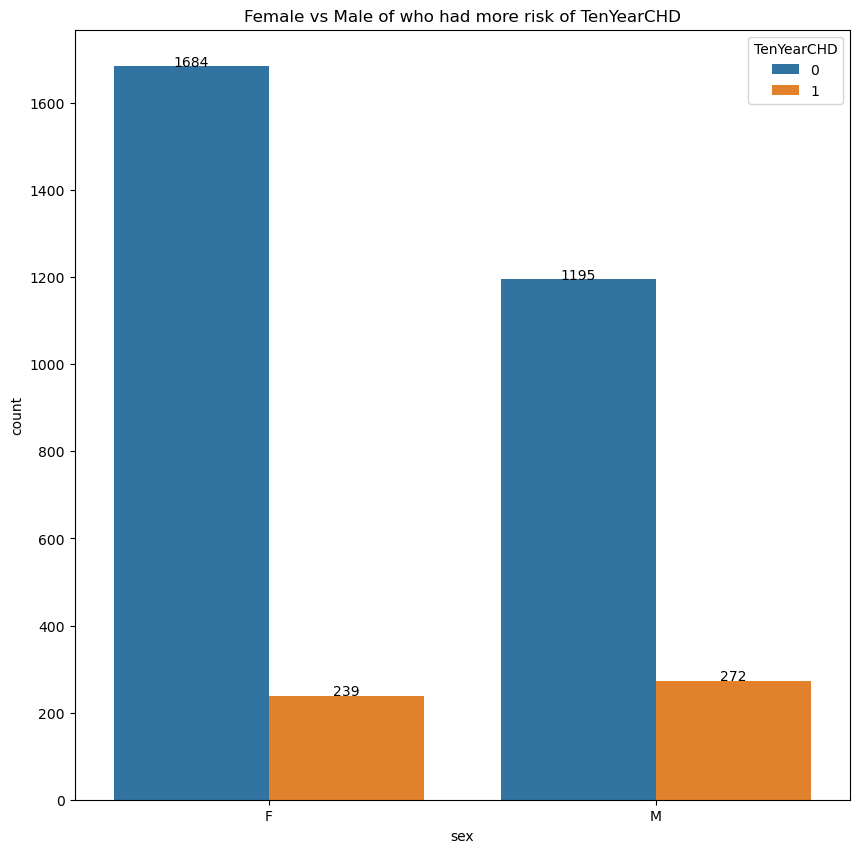

In [11]:
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='sex',data=heart_disease,hue='TenYearCHD')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height(),ha='center')#we use this line of code to display the count on top of the countplots.
plt.title('Female vs Male of who had more risk of TenYearCHD')
plt.show()

## From this we can clearly see that the number of males who had chd were more than the ones in females and the there were more females who didnt have chd so this concludes that males are more susceptible to chd comapred to females.

In [12]:
heart_disease.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


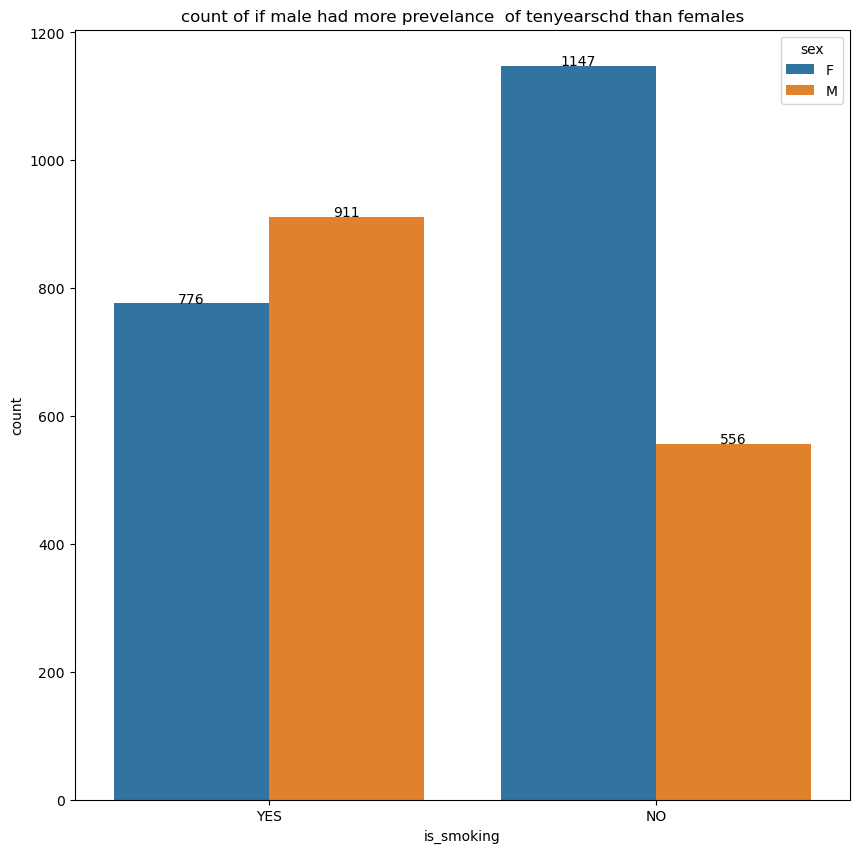

In [13]:
#now our goal is to check how many of them were smokers
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='is_smoking',data=heart_disease,hue='sex')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height(),ha='center')
plt.title('count of if male had more prevelance  of tenyearschd than females')
plt.show()

## From this we can see that smoking ratio is more in men compared to women and most of the women did not smoke 


###  Smoking increases the formation of plaque in blood vessels. Coronary Heart Diseaseoccurs when arteries that carry blood to the heart muscle are narrowed by plaque or blocked by clots. Chemicals in cigarette smoke cause the blood to thicken and form clots inside veins and arteries. 

### Here we can telll that the risk of developing ten year chd might have become more prevelant due to the males and females smoking.

In [14]:
heart_disease.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [15]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

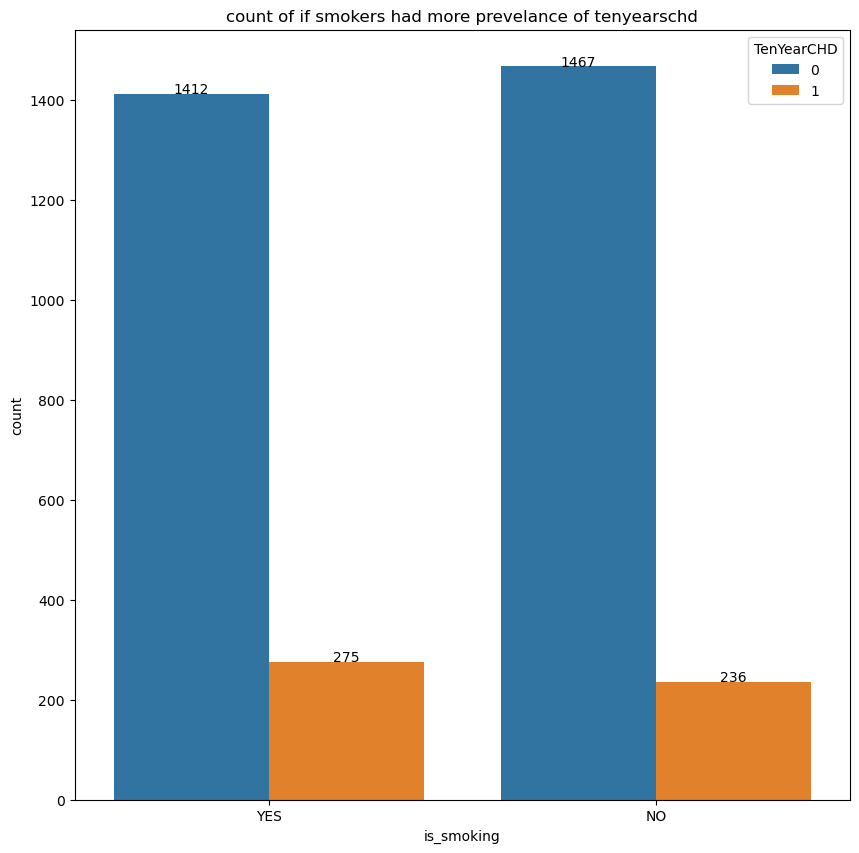

In [16]:
##let us try to confirm the above .
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='is_smoking',data=heart_disease,hue='TenYearCHD')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height(),ha='center')
plt.title('count of if smokers had more prevelance of tenyearschd')
plt.show()

## We can see that prevelance of chd was more in people who were smokers compared to people in non smokers .

In [17]:
heart_disease.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [18]:
heart_disease['cigsPerDay'].value_counts()

0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

In [19]:
heart_disease['age'].value_counts()
heart_disease['age'].min()
heart_disease['age'].max()

70

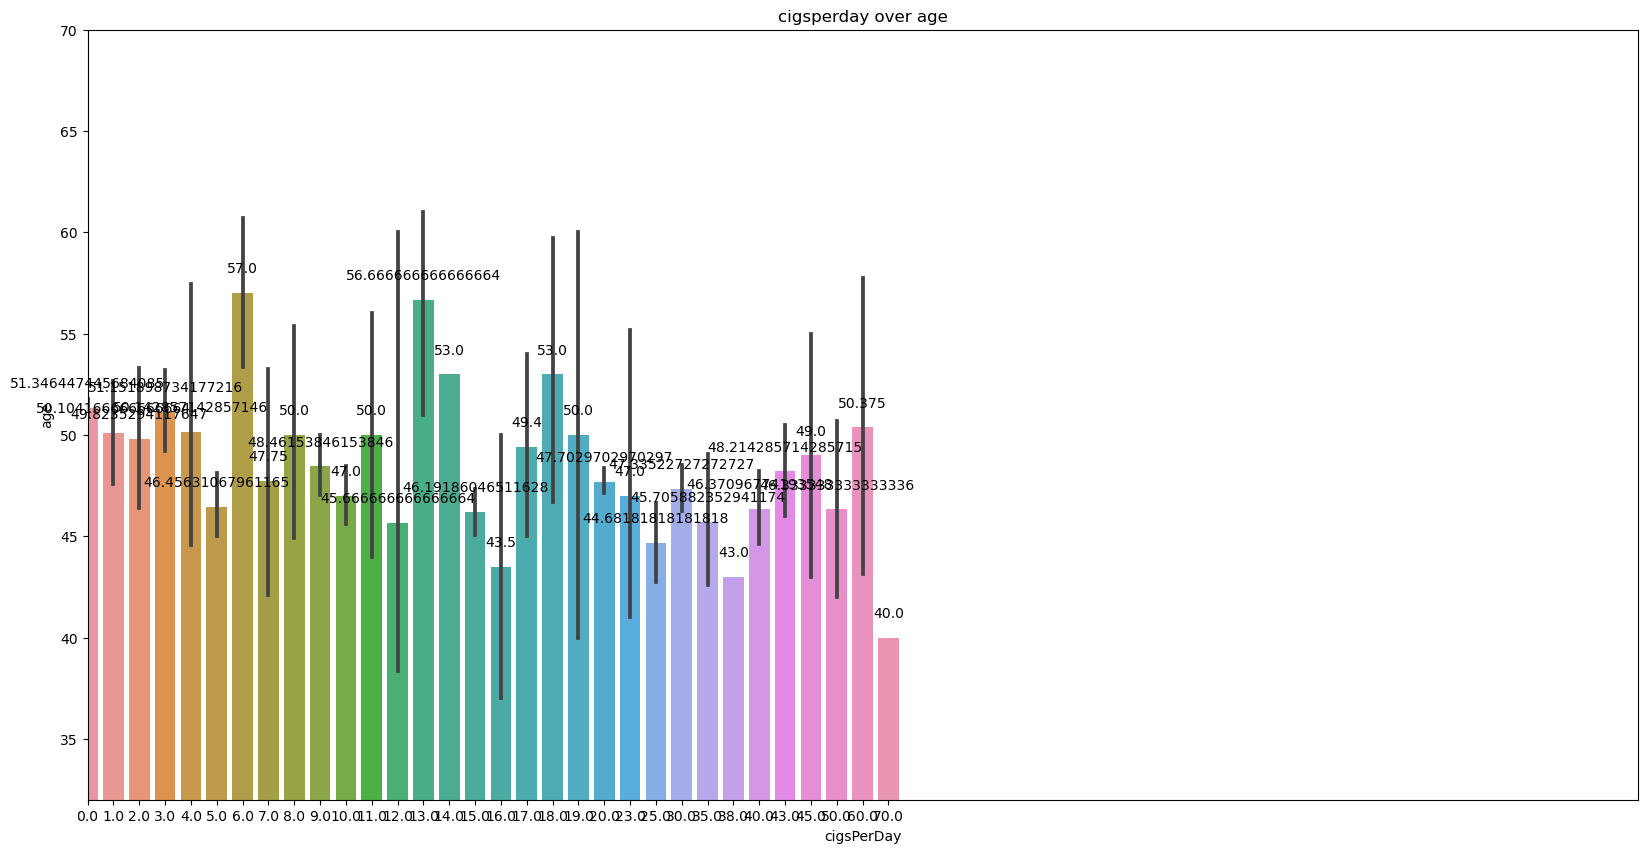

In [20]:
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='cigsPerDay',y='age',data=heart_disease)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height(),ha='center')
plt.xlim([0,60])
plt.ylim([32,70])
plt.title('cigsperday over age')
plt.show()


In [21]:
heart_disease.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


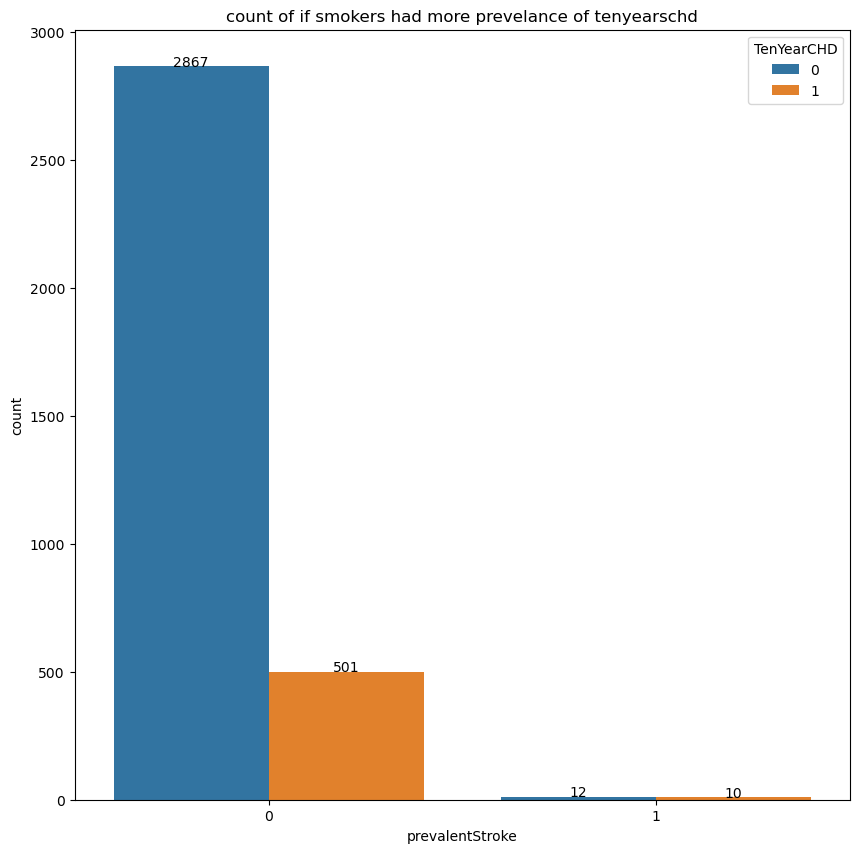

In [22]:
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='prevalentStroke',data=heart_disease,hue='TenYearCHD')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height(),ha='center')
plt.title('count of if smokers had more prevelance of tenyearschd')
plt.show()

In [23]:
## will check if the prevelant stroke is more prevelant in male or females for now signing offf good bye.

In [24]:
heart_disease

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


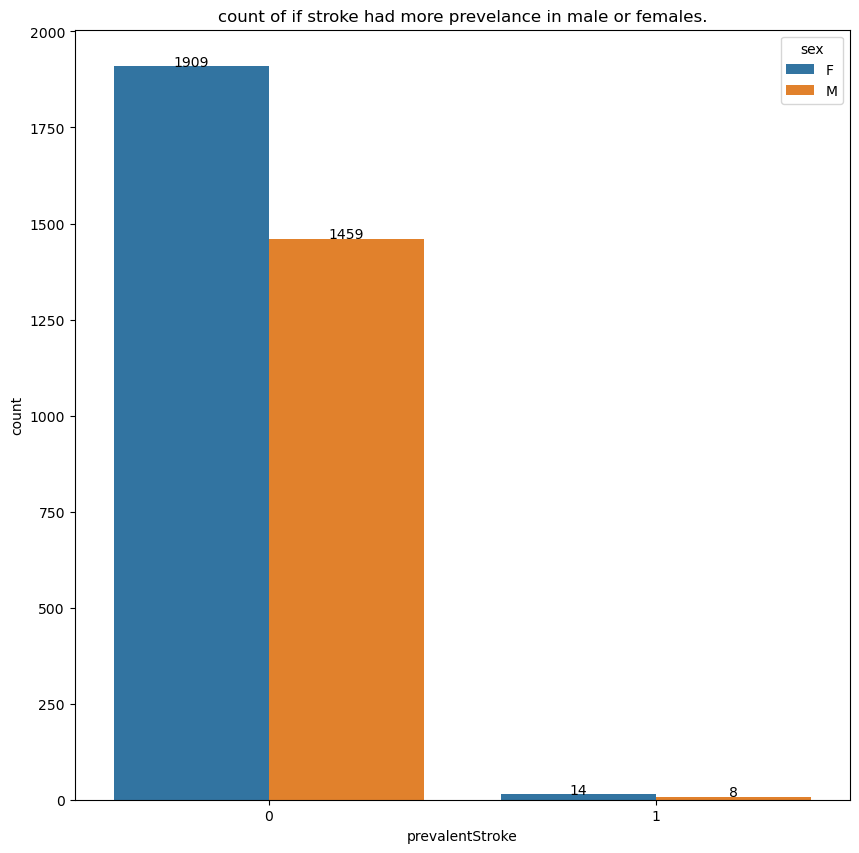

In [25]:
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='prevalentStroke',data=heart_disease,hue='sex')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height(),ha='center')
plt.title('count of if stroke had more prevelance in male or females.')
plt.show()

### As we can see the prevelance of stroke was more pevelant in females than males.

In [26]:
#let us check is stroke is correlated to tenyearchd

In [27]:
#let us create a heatmap

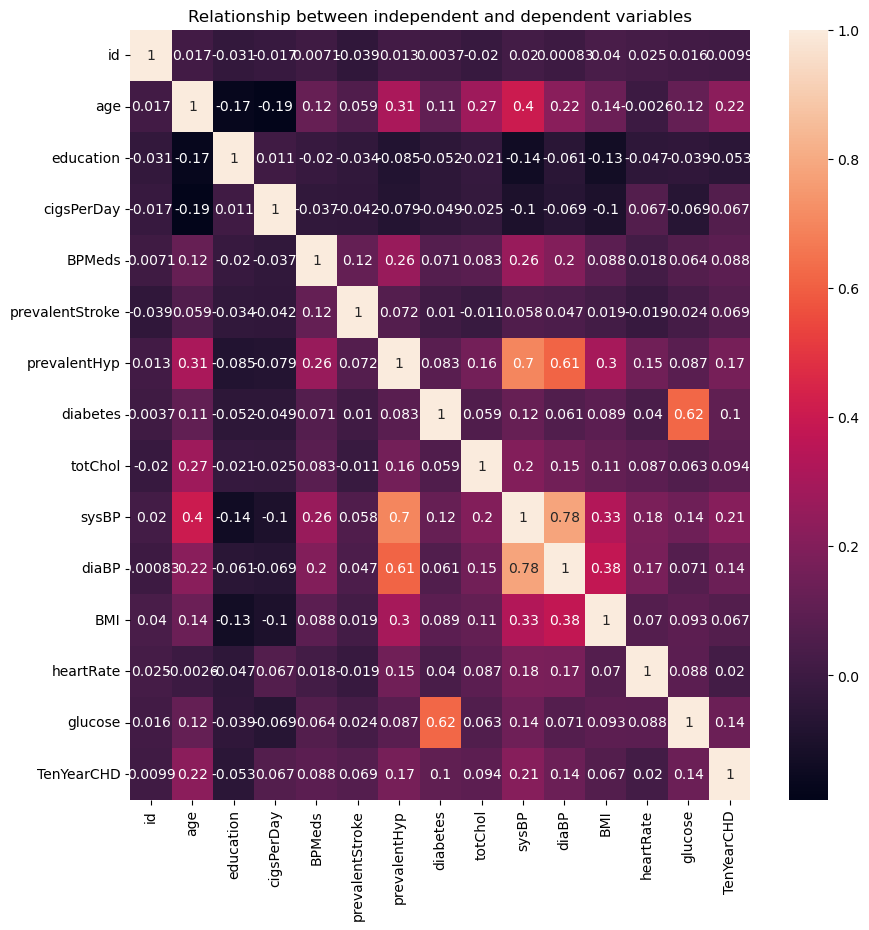

In [28]:
fig,ax = plt.subplots(figsize=(10,10))
corr_mat = heart_disease.corr()
ax = sns.heatmap(corr_mat,annot=True)
plt.title('Relationship between independent and dependent variables')
plt.show()


## As we can see correlation is not that correlated to ten year chd

In [29]:
#let us now cherck for outliers .
def outliers(data,col):
    '''This function calculates the ouliers using the IQR method'''
    arr = np.array(data[col])
    sorted_data = np.sort(arr)
    q1,q3 = np.percentile(sorted_data,[25,75])
    IQR = q3-q1
    lower_fence = q1-0.5*(IQR)
    upper_fence = q3+0.5*(IQR)     
    outliers_list = [x for x in sorted_data if x<lower_fence or x>upper_fence]
    return(outliers_list)



In [30]:
#let us now filter out the numeric columns and categorical columns 
numeric_cols = []#this contains a list of numeric column
object_cols = []#this contains a list of object column
for col,content in heart_disease.items():#this like treats the dataframe like a dictionary 
    if pd.api.types.is_numeric_dtype(heart_disease[col]):
        numeric_cols.append(col)
    elif pd.api.types.is_object_dtype(heart_disease[col]):
        object_cols.append(col)
        
    

In [31]:
#let us check the lists
numeric_cols
object_cols

['sex', 'is_smoking']

In [32]:
numeric_cols

['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [33]:
for c in numeric_cols:
    print(f'The outliers for column {c} is:')
    print(outliers(heart_disease,c))#whenever we call a function inside for loop we need call the print function as well else it will not print the output
    
    #as we can see we arent getting anyu response probably no outliers let us prepare some visalizations to do this 
    

The outliers for column id is:
[]
The outliers for column age is:
[32, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 70, 70]
The outliers for column education is:
[]


In [34]:
for i,j in enumerate(heart_disease.columns):
    print(i,j)#this is the use of enumerate function 

0 id
1 age
2 education
3 sex
4 is_smoking
5 cigsPerDay
6 BPMeds
7 prevalentStroke
8 prevalentHyp
9 diabetes
10 totChol
11 sysBP
12 diaBP
13 BMI
14 heartRate
15 glucose
16 TenYearCHD


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

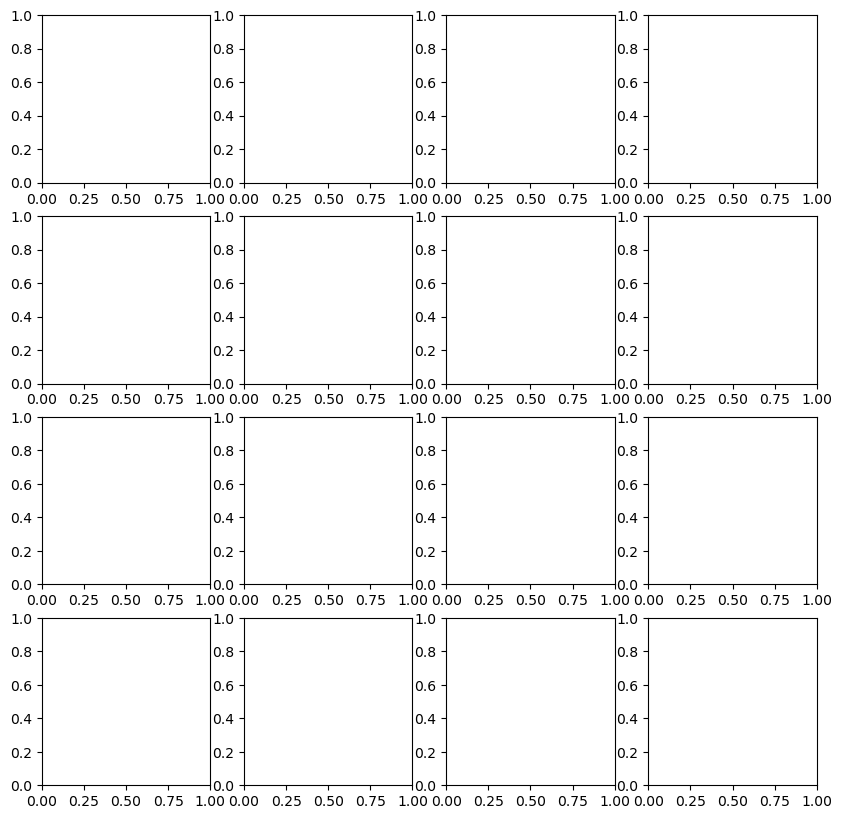

In [35]:
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(10,10))
ax#array ius a two dimensional array so only we used flatten to convert two dimensional array to one dimnesional array
#the ax in subplots is a two 2d array when we print it out and we can flatten it using flatten() function provided by numpy.

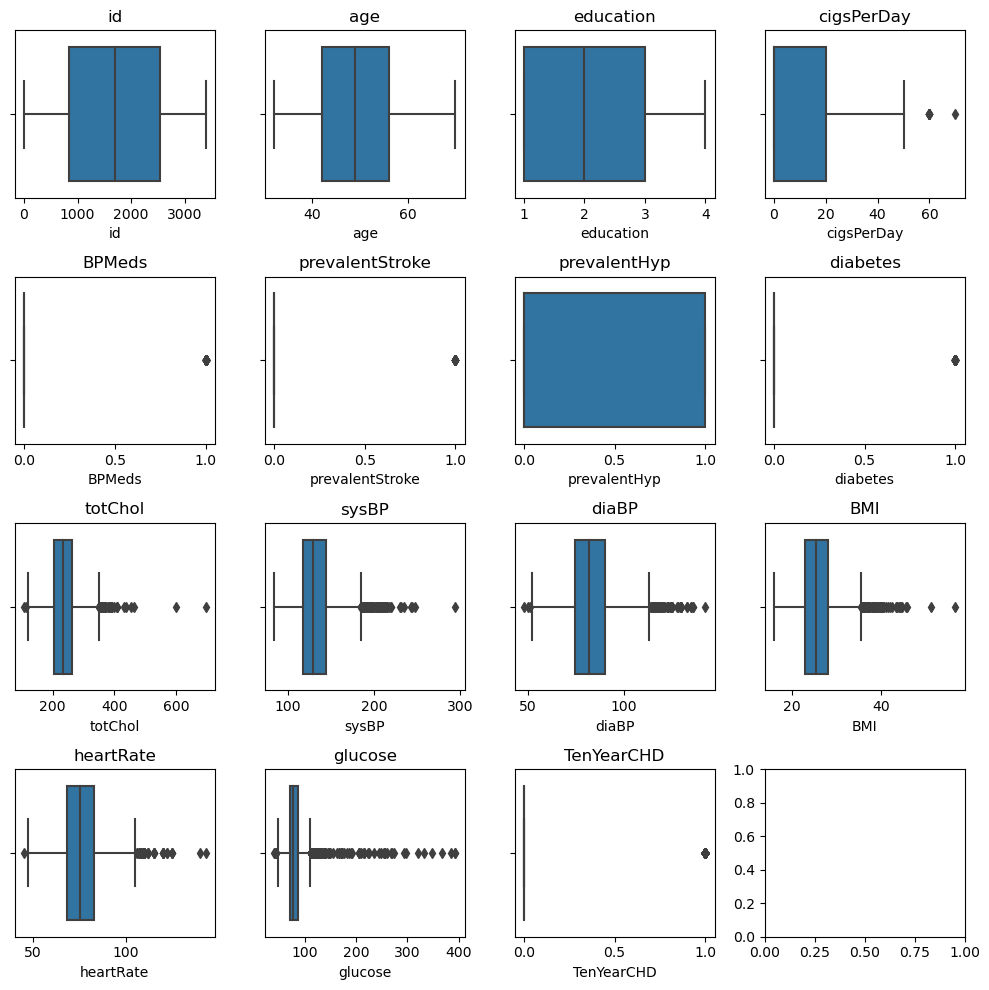

In [36]:
## For the purpose of outliers we will be constructing box plots tocheck this out 
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(10,10))
ax=ax.flatten()#flatten() is a NumPy function that can be used to convert a multi-dimensional array into a one-dimensional array.
#the reason why we converted 2d array into 1d array is so that we can avoid the use of nested for loops to acces the axes of the plots using nested loops makes it complicated
for index,col in enumerate(numeric_cols):
    sns.boxplot(x=col,data=heart_disease,ax=ax[index])
    ax[index].set_title(col)
plt.tight_layout()
plt.show()

    

 ## From the above graphs we can see that there are outliers present in the data which we will have to deal with it else it can affect or will have an adverse effect on our machine learning model.

## Now let us check for missing values 

In [37]:
heart_disease.isna().sum()#we are checking the missing values 

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

#### From the above series we can see that education ,cigsPerDay, BPMeds ,heartRate and glucose have missing values which we will have to deal with.

## Now we will check the distribution of each numeric column

In [38]:
def check_dist(data,col):
    plt.figure(figsize=(10,10))
    sns.displot(x=col,data=data,kde=True)
    plt.show()


<Figure size 1000x1000 with 0 Axes>

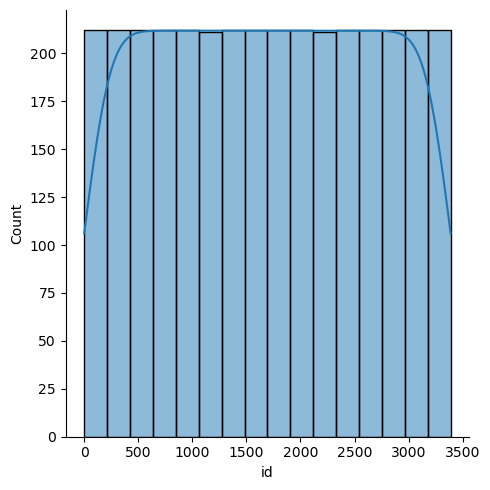

<Figure size 1000x1000 with 0 Axes>

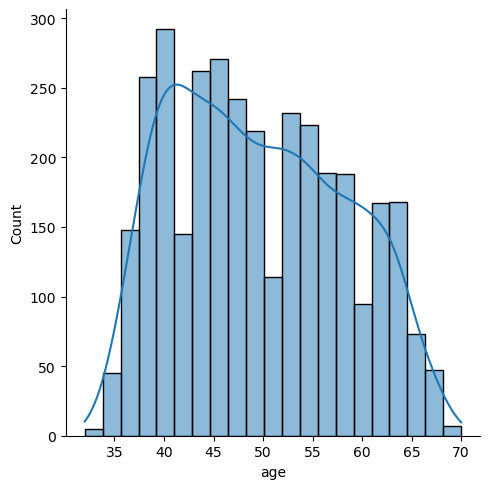

<Figure size 1000x1000 with 0 Axes>

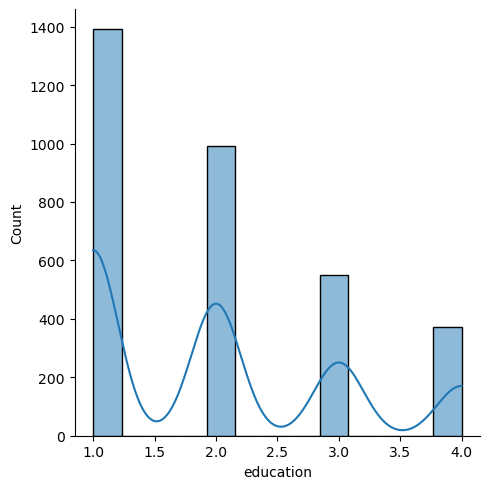

<Figure size 1000x1000 with 0 Axes>

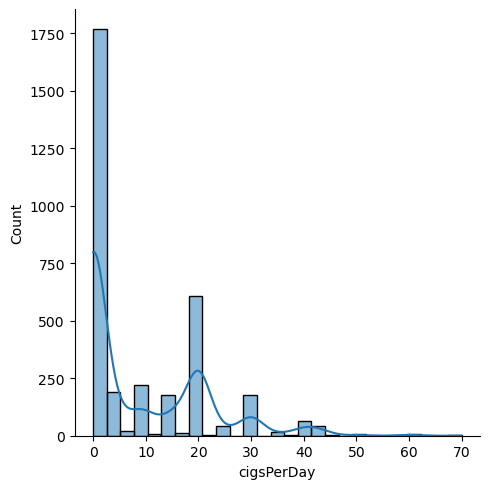

<Figure size 1000x1000 with 0 Axes>

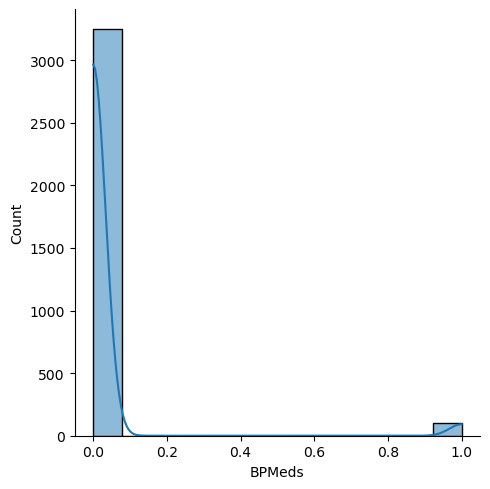

<Figure size 1000x1000 with 0 Axes>

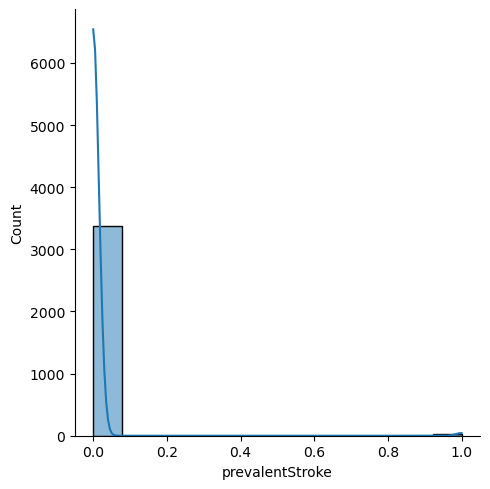

<Figure size 1000x1000 with 0 Axes>

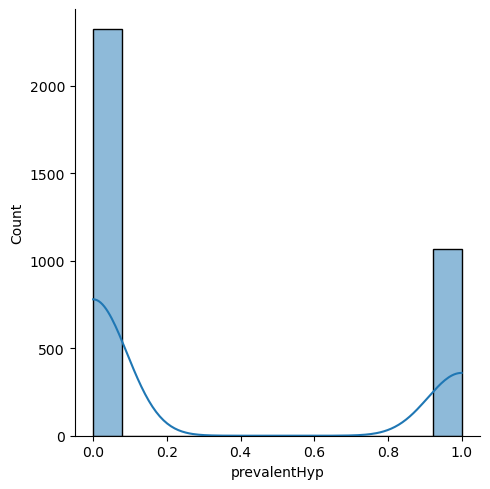

<Figure size 1000x1000 with 0 Axes>

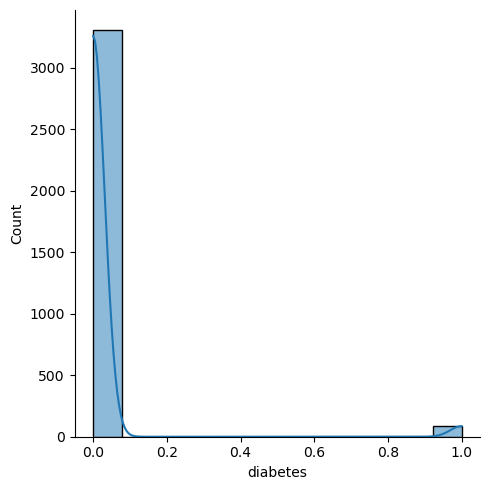

<Figure size 1000x1000 with 0 Axes>

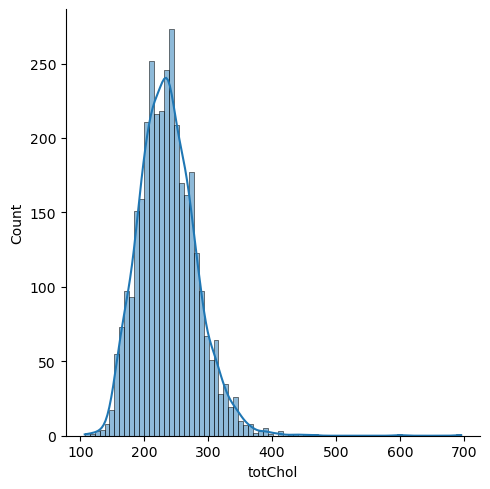

<Figure size 1000x1000 with 0 Axes>

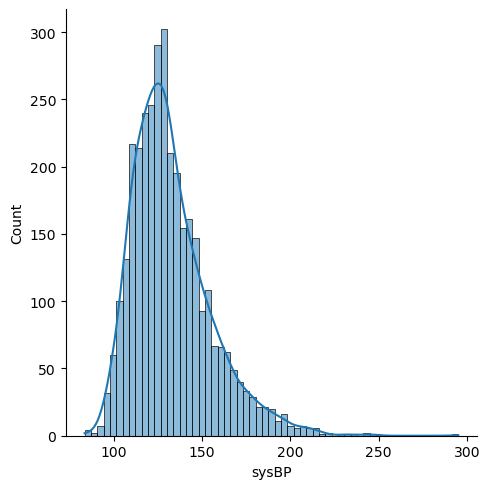

<Figure size 1000x1000 with 0 Axes>

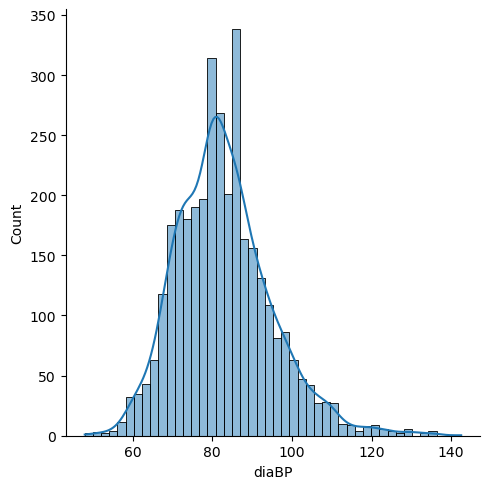

<Figure size 1000x1000 with 0 Axes>

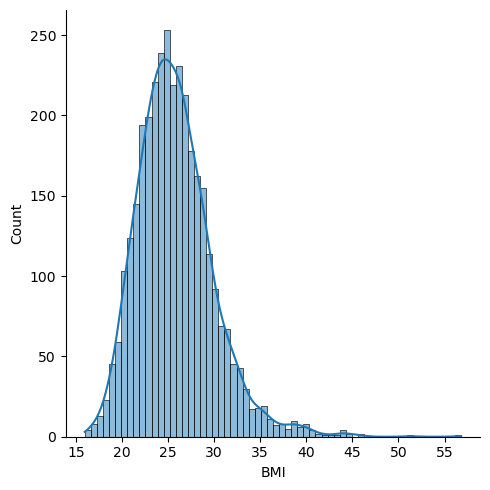

<Figure size 1000x1000 with 0 Axes>

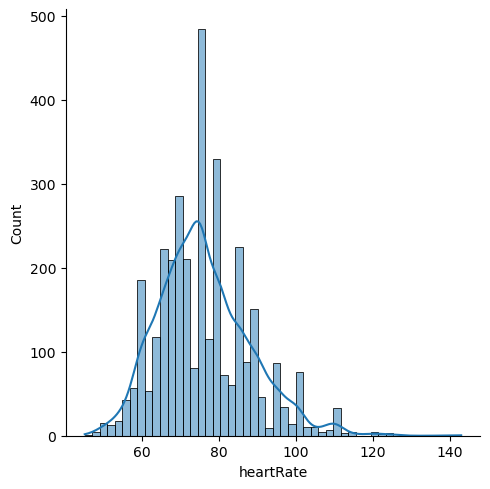

<Figure size 1000x1000 with 0 Axes>

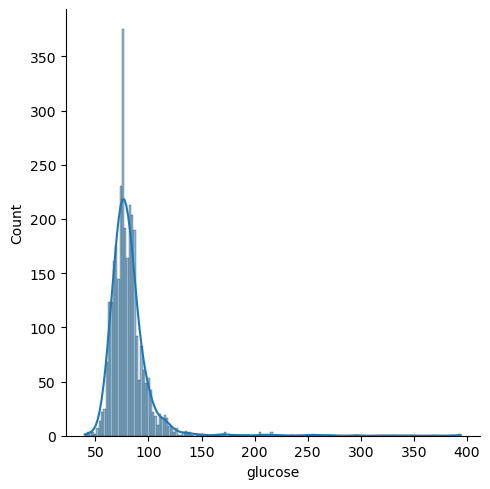

<Figure size 1000x1000 with 0 Axes>

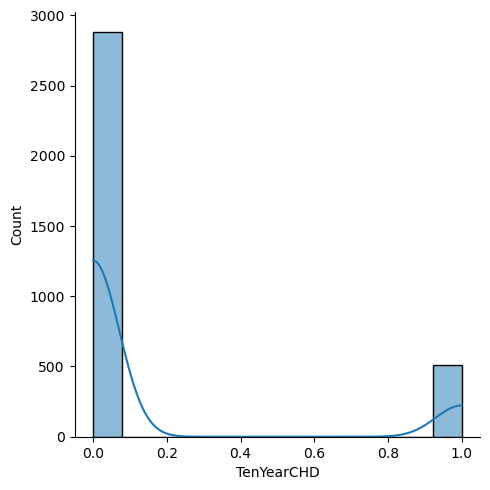

In [39]:
for c in numeric_cols:
    check_dist(heart_disease,c)

## From the above graphs we can see that a few columns do not follow gaussian distribtuion so we will have to work on that.


# Let us begin with data preprocessing 

In [40]:
#let us first start of by filling missing values

In [41]:
heart_disease.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [42]:
missing_cols = ['education','cigsPerDay','BPMeds','BMI','heartRate','glucose','totChol']#this is a list of all the missing columns 

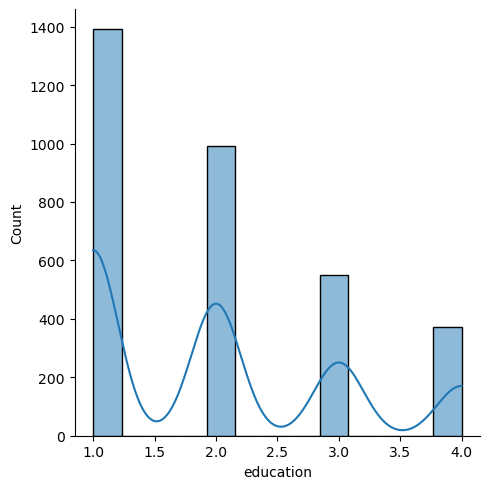

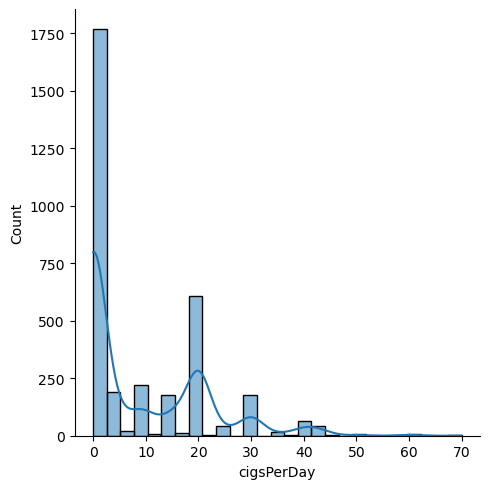

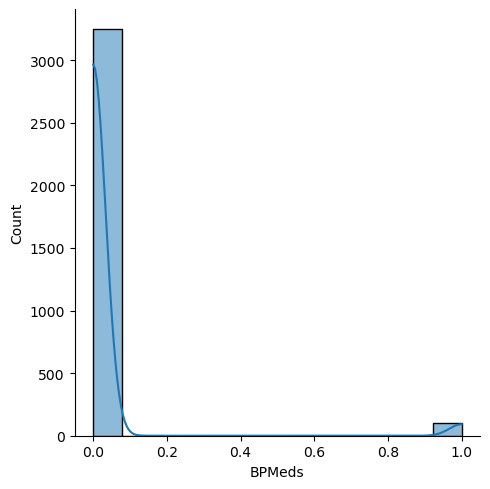

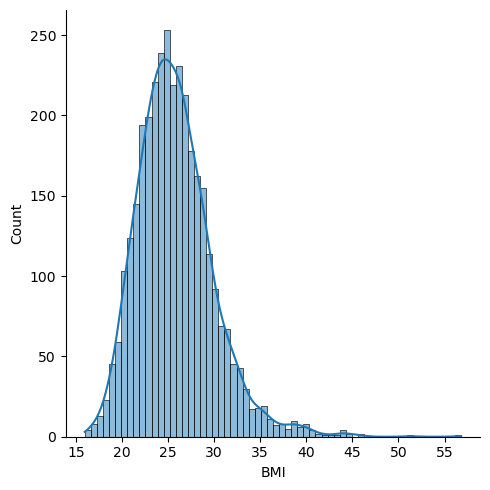

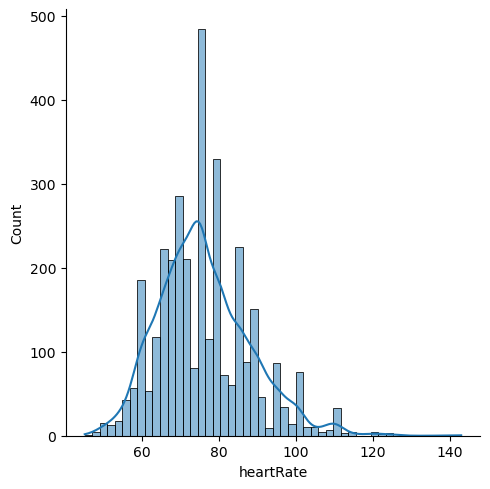

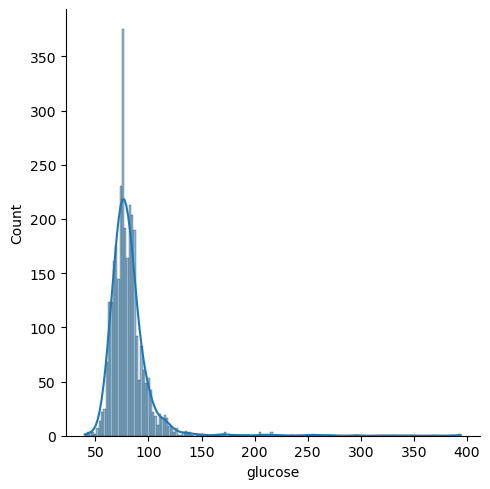

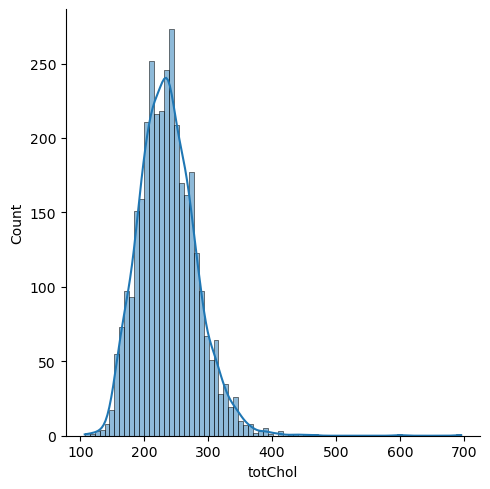

In [43]:
for c in missing_cols:
    sns.displot(heart_disease[c],kde=True)

In [44]:
heart_disease_copy = heart_disease.copy()#here i made a copy of the dataset

In [45]:
#let us fill the missing values with the median
heart_disease_copy['heartRate'].fillna(heart_disease_copy['heartRate'].median(),inplace=True)
heart_disease_copy['glucose'].fillna(heart_disease_copy['glucose'].median(),inplace=True)
heart_disease_copy['BPMeds'].fillna(heart_disease_copy['BPMeds'].median(),inplace=True)
heart_disease_copy['cigsPerDay'].fillna(heart_disease_copy['cigsPerDay'].median(),inplace=True)
heart_disease_copy['education'].fillna(heart_disease_copy['education'].median(),inplace=True)
heart_disease_copy['BMI'].fillna(heart_disease_copy['BMI'].median(),inplace=True)
heart_disease_copy['totChol'].fillna(heart_disease_copy['totChol'].median(),inplace=True)

In [46]:
#let us check for missing values now 
heart_disease_copy.isna().sum()#as we can see we have filled all the missing values mainly with the median.

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [47]:
numeric_columns = ['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [48]:
#now let us remove the outliers.
def outlier_removal(data):
    '''This function is used to remove outliers it takes the whole data frame as an arguement.'''
    
    for c in numeric_columns:
        arr=np.array(data[c])
        sorted_arr = np.sort(arr)
        q1,q3=np.percentile(sorted_arr,[25,75])        
        iqr = q3-q1
        lower_fence=q1-1.5*(iqr)
        upper_fence = q3+1.5*(iqr)
        new_df=data[(data[c]>=lower_fence) & (data[c]<=upper_fence)]
        
    return new_df
        

In [49]:
#let us check if the function works
removed_outliers_df=outlier_removal(heart_disease_copy)#yes it looks like this function works
removed_outliers_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [50]:
heart_disease

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0



## If we compare both the dataframes we can notice that we have seem to lost some samples but its fine.

In [51]:
removed_outliers_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [52]:
removed_outliers_df.isna().sum()
#yes looks like we are all set to go.

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## We have to convert the sex column into numerical values.


In [53]:
removed_outliers_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


## FEATURE ENGINEERING

In [54]:
#let us implement the above changes in the original dataframe
removed_outliers_df['male'] = np.where(removed_outliers_df['sex']=='M',1,0)
removed_outliers_df['female'] = np.where(removed_outliers_df['sex']=='F',1,0)
removed_outliers_df['smokes'] = np.where(removed_outliers_df['is_smoking']=='YES',1,0)
removed_outliers_df['doesnt_smoke'] = np.where(removed_outliers_df['is_smoking']=='NO',1,0)

C:\Users\mailt\AppData\Local\Temp\ipykernel_31568\116484120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_outliers_df['male'] = np.where(removed_outliers_df['sex']=='M',1,0)
C:\Users\mailt\AppData\Local\Temp\ipykernel_31568\116484120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_outliers_df['female'] = np.where(removed_outliers_df['sex']=='F',1,0)
C:\Users\mailt\AppData\Local\Temp\ipykernel_31568\116484120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [55]:
#let us drop the sex column
removed_outliers_df.drop('sex',axis=1,inplace=True)

C:\Users\mailt\AppData\Local\Temp\ipykernel_31568\1458302898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_outliers_df.drop('sex',axis=1,inplace=True)


In [56]:
removed_outliers_df

,id,age,education,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male,female,smokes,doesnt_smoke
0,0,64,2.0,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0,1,1,0
1,1,36,4.0,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,0,0,1
2,2,46,1.0,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,1,1,0
3,3,50,1.0,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,0,1,0
4,4,64,1.0,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,0,1,0,1
3386,3386,46,1.0,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,0,1,0,1
3387,3387,44,3.0,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,1,0,1,0
3388,3388,60,1.0,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,1,0,0,1


In [57]:
#let us drop the is_smoking column
removed_outliers_df.drop('is_smoking',axis=1,inplace=True)

C:\Users\mailt\AppData\Local\Temp\ipykernel_31568\1532834903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_outliers_df.drop('is_smoking',axis=1,inplace=True)


In [58]:
#we can drop the id column as well we do not need that
removed_outliers_df.drop('id',axis=1,inplace=True)

C:\Users\mailt\AppData\Local\Temp\ipykernel_31568\1141326788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_outliers_df.drop('id',axis=1,inplace=True)


In [59]:
removed_outliers_df

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male,female,smokes,doesnt_smoke
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0,1,1,0
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,0,0,1
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,1,1,0
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,0,1,0
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,0,1,0,1
3386,46,1.0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,0,1,0,1
3387,44,3.0,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,1,0,1,0
3388,60,1.0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,1,0,0,1


In [60]:
removed_outliers_df['TenYearCHD'].value_counts()

0    2723
1     453
Name: TenYearCHD, dtype: int64

## Modelling .

#### Here we will start with making a machine learning model for our processed data set

In [61]:
##let us beging with the machine learning modelling part.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [63]:
#let us spit the data into independent and dependent variables\
X= removed_outliers_df.drop('TenYearCHD',axis=1)
y = removed_outliers_df['TenYearCHD']

In [64]:
y

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3176, dtype: int64

In [65]:
X

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,female,smokes,doesnt_smoke
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,0,1,1,0
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,1,0,0,1
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1,0
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1,0
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,1,0,1
3386,46,1.0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,1,0,1
3387,44,3.0,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,0,1,0
3388,60,1.0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,1,0,0,1


In [66]:
def fit_score(models:dict,independent,dependent):
    '''This functions returns the scores of the models'''
    #let us set the seed for reproducibility
    np.random.seed(42)
    #let us split the data into train test data
    x_train,x_test,y_train,y_test = train_test_split(independent,dependent,test_size=0.2)
    #let us scale down the values 
    std=StandardScaler()#we have instantiated our strandardscaler class aka feature scaling.
    x_train_scaled = std.fit_transform(x_train)#here we are scaling down the training set
    x_test_scaled = std.fit_transform(x_test)#here we are scaling down the test set 
    #let us set an empty dictionary here
    scores={}
    for model_name,model_class in models.items():
        model = model_class()#instantiating the class
        model.fit(x_train_scaled,y_train)#here we have split the dataw
        scores[model_name] = model.score(x_test_scaled,y_test)#we are appending the scores to the scores dictionary
    return scores

In [67]:
#let us test function 
classfiers = {'Logistic reg':LogisticRegression,
             'Decision tree':DecisionTreeClassifier,
             'Random Forest':RandomForestClassifier}


In [68]:
baseline_model=fit_score(classfiers,X,y)
baseline_model#this is the baseline model a dictionary

{'Logistic reg': 0.8584905660377359,
 'Decision tree': 0.7688679245283019,
 'Random Forest': 0.8569182389937107}

In [69]:
#let us visualize this score

baseline_models = pd.DataFrame(baseline_model,index=['accuracy'])

In [70]:
baseline_models

,Logistic reg,Decision tree,Random Forest
accuracy,0.858491,0.768868,0.856918


In [71]:
baseline_models.index

Index(['accuracy'], dtype='object')

In [72]:
baseline_scores=baseline_models.T#let us plot the transpose of this 

In [73]:
baseline_scores

,accuracy
Logistic reg,0.858491
Decision tree,0.768868
Random Forest,0.856918


<AxesSubplot:>

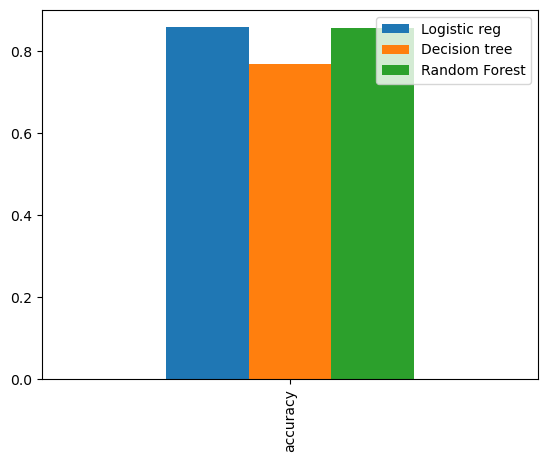

In [74]:
baseline_models.plot.bar() #here we can see that the index are nothing but model names and are being used as legends and the columns are being in x axis

In [75]:
### As we can see from the two grpahs either one we can choose for our reference depends on you .

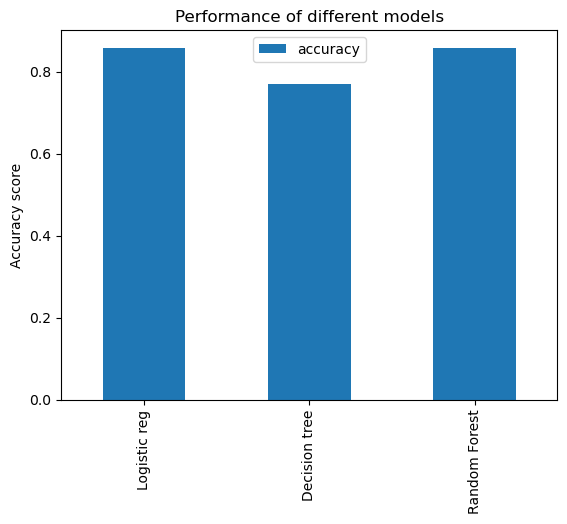

In [76]:
baseline_scores.plot.bar()#Here as we can see we are directly plotting from the dataframe itself using the matoplotlib pandas api i think this is what it was called need to check once again.
plt.ylabel('Accuracy score')
plt.title('Performance of different models')
plt.show()#here we can see that the columns have been renamed to the model names and accuracy score is the index which is being used as legend.

## From the above graph we can see that logistic regression has a good score followed by random forest and then decision trees overally all the models have performed well. 

In [77]:
 ## to be continued we need to continue from hyperparameter tunning 

### Hyperparameter tuning - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
### Feature importance - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
### Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
### Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
### Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
### Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
### F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
### Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
### ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
### Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

In [78]:
#we need to do the train test split again 
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [79]:
x_train

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,female,smokes,doesnt_smoke
564,41,2.0,9.0,0.0,0,0,0,280.0,129.0,89.0,39.69,110.0,65.0,0,1,1,0
914,57,4.0,0.0,0.0,0,1,0,310.0,147.5,90.0,32.09,67.0,73.0,1,0,0,1
2773,38,2.0,0.0,0.0,0,0,0,239.0,128.0,84.5,33.49,75.0,80.0,0,1,0,1
2569,42,1.0,0.0,0.0,0,0,0,245.0,117.5,90.0,22.65,85.0,96.0,0,1,0,1
2664,57,1.0,20.0,1.0,0,1,0,281.0,192.0,105.0,27.04,64.0,75.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,52,1.0,3.0,0.0,0,1,0,210.0,185.0,114.0,27.01,70.0,83.0,0,1,1,0
1205,36,1.0,15.0,0.0,0,0,0,300.0,102.0,66.5,25.68,100.0,100.0,1,0,1,0
1383,50,4.0,9.0,0.0,0,0,0,256.0,136.5,81.0,23.07,75.0,78.0,0,1,1,0
910,62,1.0,7.0,0.0,0,0,0,260.0,104.0,69.0,24.02,70.0,93.0,1,0,1,0


In [80]:
x_test

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,female,smokes,doesnt_smoke
2420,60,2.0,0.0,0.0,0,0,0,354.0,130.0,82.5,26.76,65.0,79.0,0,1,0,1
466,45,3.0,0.0,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,1,0,1,0
3079,38,2.0,35.0,0.0,0,0,0,192.0,107.0,71.0,24.28,75.0,78.0,0,1,1,0
1765,55,2.0,0.0,0.0,0,0,0,266.0,131.0,76.0,26.45,72.0,84.0,0,1,0,1
1062,40,3.0,10.0,0.0,0,0,0,210.0,103.0,71.0,24.40,73.0,68.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,49,4.0,0.0,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1,0,1,0
733,42,3.0,0.0,0.0,0,0,0,464.0,128.0,87.0,22.90,72.0,72.0,0,1,0,1
843,52,3.0,20.0,0.0,0,0,0,215.0,132.0,82.0,25.11,71.0,75.0,0,1,1,0
3218,54,1.0,30.0,0.0,0,1,0,177.0,162.5,99.5,22.97,65.0,93.0,1,0,1,0


In [81]:
y_train

564     0
914     1
2773    0
2569    0
2664    0
       ..
1165    0
1205    0
1383    0
910     0
3388    0
Name: TenYearCHD, Length: 2540, dtype: int64

In [82]:
y_test

2420    0
466     0
3079    0
1765    0
1062    1
       ..
2087    1
733     1
843     0
3218    1
1128    0
Name: TenYearCHD, Length: 636, dtype: int64

In [83]:
#alright we can now proceed with hyperparameter tunning

In [84]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
    

In [85]:
#let us set a random seed
np.random.seed(42)
#let us call the randomized search cv classs
rf_rs  = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,
                           cv=5,#k=5 cross validation
                            n_iter=30,#number of iterations we want the class to run
                            verbose=True
                           )
rf_rs.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [86]:
#let us check theb best parameter 
rf_rs.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [87]:
#let us check out the score 
rf_score = rf_rs.score(x_test,y_test)
rf_score

0.8632075471698113

### This is excellent! After tunning the hyperparameter we can notice that we have a slight improvement in the performance in random forest model,let us try for our other models.

In [88]:
#let us test the function 
log_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}#these are the hyperparameters which we want improve the performance of our logistic regression model
log_rs = RandomizedSearchCV(LogisticRegression(),param_distributions=log_grid,cv=5,n_iter=30,verbose=True)
#let us fit the model
log_rs.fit(x_train,y_train)

C:\Users\mailt\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [89]:
#looks like the randomized search cv has done its work let us check the best parameters it has found.

In [90]:
log_rs.best_params_#these are the best parameters 

{'solver': 'liblinear', 'C': 29.763514416313132}

In [91]:
#let us check the score of this model
log_score=log_rs.score(x_test,y_test)
log_score,rf_score

(0.8632075471698113, 0.8632075471698113)

In [92]:
#let us check the baseline scores once again
baseline_models

,Logistic reg,Decision tree,Random Forest
accuracy,0.858491,0.768868,0.856918


In [93]:
#As we can see we have got higher scores or accuracy than baseline models whichh is pretty good for me LETS GO!

In [94]:
from sklearn.metrics import accuracy_score

y_preds=log_rs.predict(x_test)
score = accuracy_score(y_test,y_preds)
score
##this is the score method explained in more detail

In [95]:
##now let us start of with some evaluation metrics .

## Evaluation metrics----> 
 * AUC ROC 
 * CONFUSION MATRIX
 *  CLASSIFICATION REPORT
 * ACCURACY

In [96]:
#let us import the plot_auc_roc curve 
from sklearn.metrics  import plot_roc_curve
from sklearn.metrics import roc_auc_score


In [97]:
y_test

2420    0
466     0
3079    0
1765    0
1062    1
       ..
2087    1
733     1
843     0
3218    1
1128    0
Name: TenYearCHD, Length: 636, dtype: int64

In [98]:
y_preds = log_rs.predict(x_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### What is roc curve? 
> To put it in simple words it is the plot between the true positive rates and false positive rates of a curve 

> The more the area under the curve the better our model is performing.

* True positive = When the model predicts 1 and the truth value is 1
* False positive = When the model predicts 1 and the truth value is 0
* True negative = When the model predicts and the truth value is 0
* False negative = When the model predcits 0 but the truth value is 1

In [137]:
#let us check it out 
y_score = log_rs.predict_proba(x_test)
#from this we can see we get the probabilities of predicitng the negative label and predicitng the positive label.
y_score
y_score.shape

(636, 2)

In [100]:
y_score[:10]

array([[0.85313414, 0.14686586],
       [0.8878709 , 0.1121291 ],
       [0.941757  , 0.058243  ],
       [0.89538843, 0.10461157],
       [0.96399582, 0.03600418],
       [0.83675938, 0.16324062],
       [0.86842412, 0.13157588],
       [0.91930147, 0.08069853],
       [0.88650975, 0.11349025],
       [0.90646429, 0.09353571]])

In [101]:
#let us filter out the positive predictions 
y_probs_positive = y_score[:,1]
y_probs_positive#1d array

array([0.14686586, 0.1121291 , 0.058243  , 0.10461157, 0.03600418,
       0.16324062, 0.13157588, 0.08069853, 0.11349025, 0.09353571,
       0.05756686, 0.09903035, 0.20659835, 0.1420899 , 0.05484791,
       0.10007615, 0.05674497, 0.17546159, 0.02349325, 0.09152995,
       0.02543015, 0.10306698, 0.06169625, 0.14273469, 0.05172808,
       0.09539363, 0.05916661, 0.157691  , 0.1466133 , 0.03810466,
       0.25839519, 0.04072835, 0.07329624, 0.05100449, 0.3552313 ,
       0.04115552, 0.03631213, 0.03088416, 0.46964802, 0.17337462,
       0.08581391, 0.07608866, 0.28097322, 0.08142659, 0.0782559 ,
       0.1185684 , 0.03165887, 0.11886134, 0.10581096, 0.16531993,
       0.24852336, 0.18672201, 0.22183931, 0.10165995, 0.06040699,
       0.06434854, 0.06781883, 0.04511758, 0.04038957, 0.11681074,
       0.06250567, 0.12707666, 0.03704931, 0.12145209, 0.38841055,
       0.05225217, 0.10279609, 0.37345496, 0.28805218, 0.10442683,
       0.10067458, 0.24456577, 0.05591512, 0.0591771 , 0.06621

In [102]:
#calculate fpr ,tpr,threshold
fpr,tpr,threshold = roc_curve(y_test,y_probs_positive)
#we get array for all three
#we can make a custom function to plot this but now we have the plot_roc_curve function which does that for us 

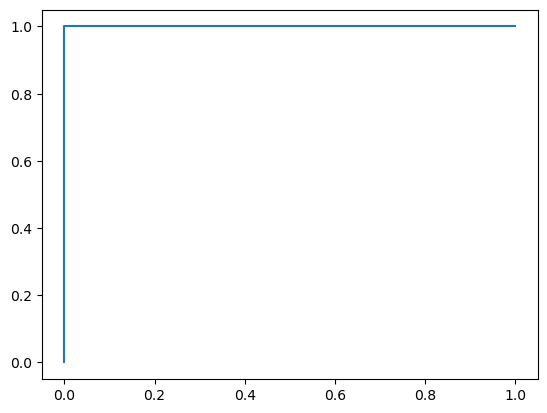

In [103]:
fpr,tpr,threshold = roc_curve(y_test,y_test)
plt.plot(fpr,tpr)
#as we can see we get a perfect area under the curve if we take y_test as both the true label and predicted label ,yes this kind of situation where the area under the curve is 1 is very undesirable because its doing too well on prediciting the true and negative labels.
#as we can see down a perfect model will get a score of 1.0 which is in this case a perfect model is not possible in practical sense.
#An ideal model will neeed to have a high tpr and a low fpr so the tpr needs to be higher than the fpr if we want the model to make accurate predictions rather than making false predictions most of the time.

#### The AUC metric tells you how well your model is at choosing between classes (for ex
ample, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

C:\Users\mailt\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


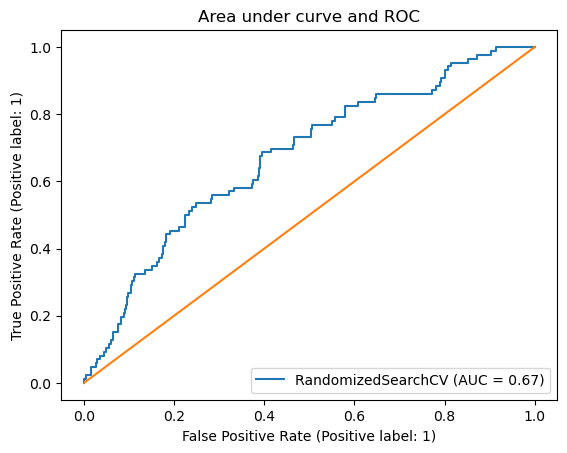

In [104]:
plot_roc_curve(log_rs,x_test,y_test)
plt.plot([0,1],[0,1])
plt.title('Area under curve and ROC')
plt.show()

C:\Users\mailt\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ROC CURVE FOR RANDOM FOREST REGRESSOR')

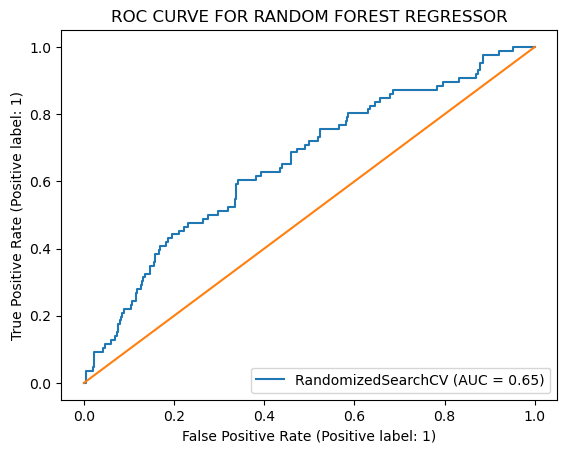

In [105]:
#let us check the roc auc for random forest regressor
plot_roc_curve(rf_rs,x_test,y_test)
plt.plot([0,1],[0,1])
plt.title('ROC CURVE FOR RANDOM FOREST REGRESSOR')

## This is actually good remember the greater the area the better the model is perfroming so the auc = 0.67 so the model is pretty good if you look at it .

## Let us goto the next evaluation metric the confusion matrix and see what that is  about.


###  A CONFUSION MATRIX IS A QUICK WAY TO COMPARE THE LABELS THAT A MODEL PREDICTS AND THE ACTUAL LABEL IT WAS SUPPOSED TO PREDICT.

### In essence it will give us an idea where the model is getting confused.

In [106]:
#let us make some predictions 
y_preds = log_rs.predict(x_test)

In [107]:
#let us build the confusion matrix
confusion_matrix(y_test,y_preds)

array([[547,   3],
       [ 84,   2]], dtype=int64)

In [108]:
#let us use the pd.cross tab to check these values because we are just getting a 2d array
pd.crosstab(y_test,y_preds,rownames=['Actual labels'],colnames=['Predicted labels'])#we use cross tab to form a cross tabulation table to compare values 

Predicted labels,0,1
Actual labels,,
0,547,3
1,84,2


### We have a severe class imbalance here as we can see but we wont be dealing with that as of now .

In [109]:
def confu_mat(test_y,predictions):
    '''This is used to plot a confusion matrix'''
       # there is a inbuilt function in puython which helps us plot the confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_true=test_y,y_pred=predictions)
    plt.title('Confusion matrix display for the prediction values by the model')
    
        

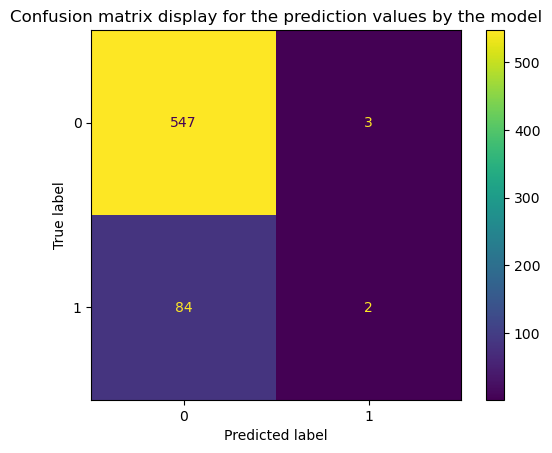

In [110]:
confu_mat(y_test,y_preds)

## Now we will goto another evaluation metric which is known as the classification report.

In [111]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       550
           1       0.40      0.02      0.04        86

    accuracy                           0.86       636
   macro avg       0.63      0.51      0.49       636
weighted avg       0.80      0.86      0.81       636



In [113]:
final_report = pd.DataFrame(classification_report(y_preds,y_test,output_dict=True))
final_report

,0,1,accuracy,macro avg,weighted avg
precision,0.994545,0.023256,0.863208,0.508901,0.986910
recall,0.866878,0.400000,0.863208,0.633439,0.863208
f1-score,0.926334,0.043956,0.863208,0.485145,0.919397
support,631.000000,5.000000,0.863208,636.000000,636.000000


<AxesSubplot:>

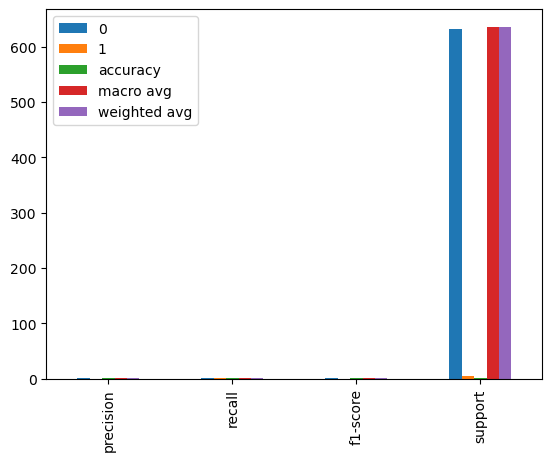

In [117]:
##can we visualize this using a bar graph let us chechk it out
final_report.plot.bar()

## Even though our model has good accuracy we can see that there is severe class imbalance as the precision to predict 0 is much higher than that of 1 as we can see in the precision and the recall incase of 0 is almost 1 and in case of 1 its almost 0 overally our model isnt going to generalize well on the new data and we have 550 instances of 0 and 86 instances of 1 which is indicated by the support metric and f1 score is nothing but precision and recall put together .

### Now we will come to the final metric which is the feature importance a.k.a model explainability 

## Now our question is why do we need model explainability? 
> Well to start off before model explainability never used to be a thing because they didnt have the mean to explain the model and why this feature is more important than this feature so they used to call such models black box models which gave results but had no reasoning as to why and how? 

> We will be focussing on visually representing the features importance in predicitng the target label.

> I wont be using lime , shap values here but its better to know and keep these are some popular libraries used.

> Which feature contribute most to predicting the output of the model.


In [118]:
##let us jump to feature importance.
##lets find feature importance for our logistic regression model.

In [119]:
##let us fit an instance of logistic regression.

In [121]:
log_rs.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [127]:
#let us now fit the instance 
#let us set the random seed
np.random.seed(42)
clf = LogisticRegression(C= 29.763514416313132,solver='liblinear')
#let us now fit the instance of the model
clf.fit(x_train,y_train)

LogisticRegression(C=29.763514416313132, solver='liblinear')

In [128]:
clf.score(x_test,y_test)

0.8632075471698113

In [131]:
#let us check out the coefficients 
clf.coef_ #we know that these are nothing but the model parameters that help us establish the relationship between independent labels and the target label.

array([[ 6.96231633e-02, -1.35732134e-02,  2.29739557e-02,
         2.29900861e-01,  1.56759730e+00,  1.61180359e-01,
        -9.78322941e-01,  1.17461187e-03,  1.39560555e-02,
        -3.97066918e-03,  4.83986714e-03,  2.47232559e-03,
         1.66078669e-03, -1.76392037e+00, -2.20338926e+00,
        -1.90443029e+00, -2.06287934e+00]])

In [138]:
clf.coef_.shape

(1, 17)

In [143]:
clf.coef_


array([[ 6.96231633e-02, -1.35732134e-02,  2.29739557e-02,
         2.29900861e-01,  1.56759730e+00,  1.61180359e-01,
        -9.78322941e-01,  1.17461187e-03,  1.39560555e-02,
        -3.97066918e-03,  4.83986714e-03,  2.47232559e-03,
         1.66078669e-03, -1.76392037e+00, -2.20338926e+00,
        -1.90443029e+00, -2.06287934e+00]])

In [145]:
#match coeff of feature to columns 
feature_dict = dict(zip(X.columns,clf.coef_[0]))#vectors/1d array
feature_dict#here we get a dictionary 

{'age': 0.06962316326696862,
 'education': -0.01357321335208731,
 'cigsPerDay': 0.022973955687849813,
 'BPMeds': 0.2299008606301139,
 'prevalentStroke': 1.5675972970090897,
 'prevalentHyp': 0.1611803593605154,
 'diabetes': -0.9783229411352271,
 'totChol': 0.0011746118722188949,
 'sysBP': 0.013956055470121548,
 'diaBP': -0.003970669180447193,
 'BMI': 0.004839867143630721,
 'heartRate': 0.0024723255903435024,
 'glucose': 0.0016607866947445289,
 'male': -1.7639203708328712,
 'female': -2.2033892598237523,
 'smokes': -1.9044302882551294,
 'doesnt_smoke': -2.062879342401458}

In [149]:
#visualize feature importance for better clarity
feature_importance = pd.DataFrame(feature_dict,index=[0])
feature_importance


,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,female,smokes,doesnt_smoke
0,0.069623,-0.013573,0.022974,0.229901,1.567597,0.16118,-0.978323,0.001175,0.013956,-0.003971,0.00484,0.002472,0.001661,-1.76392,-2.203389,-1.90443,-2.062879


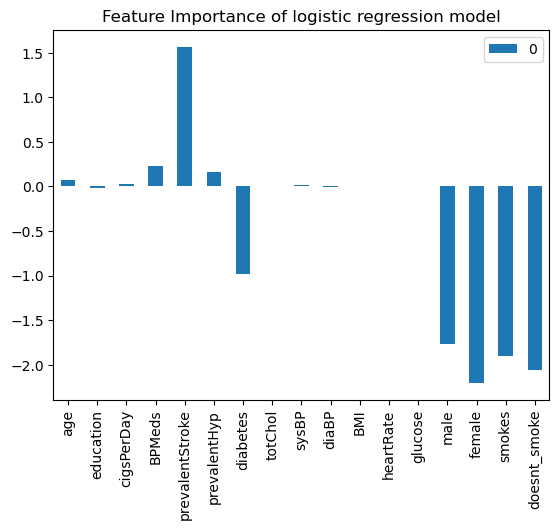

In [154]:
feature_importance.T.plot.bar()#this will help us visiually interpret the feature importance.
plt.title('Feature Importance of logistic regression model')
plt.show()

## Points to note 
* Here we see that prevelant stroke has high correlation with the target variable
* We do have a few columns that have strong negative relation with the target variable.